Homework 7 : Yeqi Chen 
===

Root Locus 

**<span style="color: darkgreen">Due Sunday May 19 at 11:59pm</span>**

**Instructions:** Make a copy of this notebook that you can edit and save. If you are using CoLab, that means clicking File>Save and then "SAVE A COPY IN DRIVE". Then, for each problem, insert your answers directly underneath the problem description as one or more `Code` or `Markdown` cells as appropriate. Every code cell should execute without errors. TAs and graders may not have resources to debug your code. When you are satisfied with your answers upload your notebook to canvas. 

**Relevant Reading**

Read up on steady state error and performance in Nise for more background.

In [63]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *
from control import *

%matplotlib inline

# Comment out in Google colab 
init_printing(use_latex='mathjax')

# Uncomment in below Google colab to render sympy equations nicely
# def custom_latex_printer(exp,**options):
#     from google.colab.output._publish import javascript
#     url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
#     javascript(url=url)
#     return printing.latex(exp,**options)
# init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

# 1. Root Locus

For each of the following plants, plot the root locus of the system
obtained using no compensator. Determine the values of: imaginary axis
crossings, points at which complex-conjugate pairs join on the real
axis, and asymptotes (intercept and angle) for zeros and infinity.

- $K G(s) = \frac{K(s+1)}{(s+2)(s+3)}$
- $K G(s) = \frac{K(s^2+1)}{(s+3)(s^2+s+1)}$
- $K G(s) = \frac{K}{(s+1)(s+2)(s^2+1)}$


(-4.0, π)

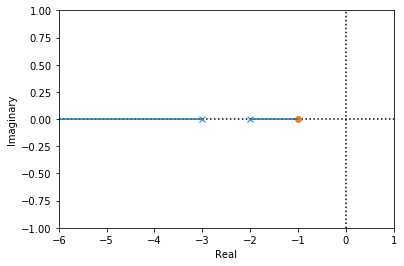

In [2]:
var("s K theta sigma pi i k")
#G = (s+1) / ( (s+2) * ( s + 3) )
G1 = tf([1,1],[1,5,6])
plot1 = root_locus(G1,xlim=[-6,1])
sigma1 = (-5 +1)/(2-1)
theta1 = pi
sigma1,theta1

Poles: -2,-3;
Zeros: -1, one at $\infty$
<br>
Imaginary axis crossings: there is no crossings in this case 
<br>
Conjugate coordinates: There is no conjugate parts in this case 
4
<br>
asymtotes: (−4.0,a*π), where a = integers


(3, π⋅(2⋅k + 1))

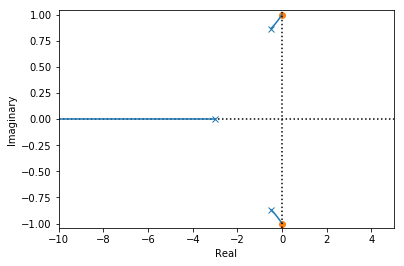

In [3]:
G2 = tf([1,0,1],[1,4,4,3])
plot2 = root_locus(G2, xlim = [-10,5])
sigma2 = (i-i-(-0.5+i*sqrt(3)/2+0.5-i*sqrt(3)/2-3))/(3-2)
theta2 = (2*k+1)*pi/(3-2)
sigma2,theta2

Poles: -3,$-\frac{1}{2}+i\frac{\sqrt{3}}{2}$,$-\frac{1}{2}-i\frac{\sqrt{3}}{2}$
<br>
zeros: $i,-i$ 
<br>
Imaginary axis crossings: 1* i, -1* i; 
<br>
Conjugate coordinates: $\pm i$, $-\frac{1}{2}\pm i\frac{\sqrt{3}}{2}$ about the real axis
<br> 
asymtotes: (3.0, $\pi+2k\pi$), where k = integers

⎛   π⋅(2⋅k + 1)⎞
⎜1, ───────────⎟
⎝        3     ⎠

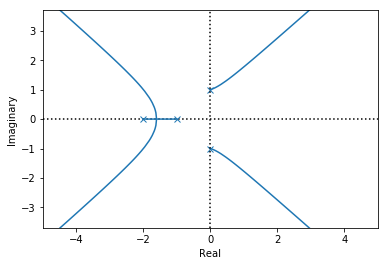

In [4]:
G3 = tf([1],[1,3,3,3,2])
plot3 = root_locus(G3, xlim = [-5,5])
sigma3 = (i-i-(-3))/(3-0)
theta3 = (2*k+1)*pi/(3-0)
sigma3,theta3

Poles: -1,-2,$i$, $-i$ 
<br>
Zeros: four zeros at $\infty$. 
<br>
Imaginary axis crossings: 1 * i, -1 * i 
<br>
Conjugate coordinates: $\pm i$ about the real axis 
<br>
asymtotes: (1.0, [$\frac {\pi}{3}$,$\pi$, $\frac {\pi}{3}$,$\dots$ ])

# 2. Controller Design

For each of the following plants $G$, design a compensator $G_c$ so that the closed
loop system $K G_c G / ( 1 + K G_c G)$ has two dominant poles near $-2 \pm i$.
Plot a root locus plot for the system before adding the compensator and another plot for after.
Use the simplest $G_c$ that you can find.
Determine the gain $K$ that will achieve the desired poles.

- $G = \frac{s+1}{s+2}$
- $G = \frac{2}{( s^2+1 ) (s+2) }$
- $G = \frac{s+1}{( s-1 ) ( s+2 )}$


1. To let both poles and zeros falls near the desired point, I picked the value of 0.9i for the poles. 

In [8]:
#polinomial for poles 
a = (s+2+0.9*i)*(s+2-0.9*i)
#polynomial for zeros 
b = (s+2+i)*(s+2-i)
a,b

((-0.9⋅i + s + 2)⋅(0.9⋅i + s + 2), (-i + s + 2)⋅(i + s + 2))

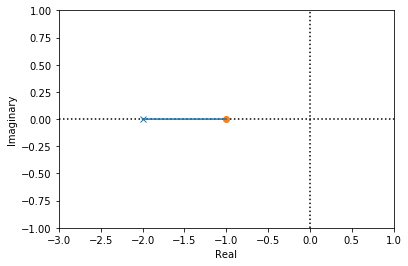

In [9]:
#original root_locus
sys1 = tf([1,1],[1,2])
r,k = root_locus(sys1,xlim=(-3,1))


In [10]:
G1 = (s+1)/(s+2)*b/a
G1.simplify()

    (s + 1)⋅(-i + s + 2)⋅(i + s + 2)    
────────────────────────────────────────
(s + 2)⋅(-0.9⋅i + s + 2)⋅(0.9⋅i + s + 2)

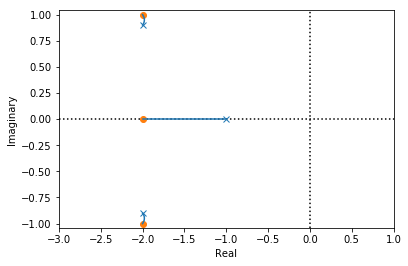

In [11]:
sys11 = tf([1,6,13,10],[1,5,8.81,4.81])
r,k = root_locus(sys11,xlim=(-3,1))

So by adding the $G_c$ = $\frac{(−i+s+2)(i+s+2))}{(−0.9i+s+2)(0.9i+s+2)}$, we can add two poles and two zeros near the desired point $-2 \pm i$. when K approaches to $\infty$, the poles would be close to $-2 \pm i$.

2,  To let both poles and zeros falls near the desired point, I picked the value of 0.9i for the poles.  I used the same $G_c$ in this question. 

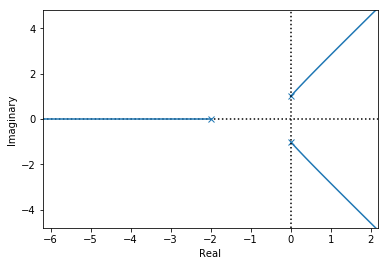

In [12]:
#original root locus 
sys2 = tf([1],[1,2,1,2])
r,k = root_locus(sys2)

In [13]:
G2 = 2/(s**2+1)/(s+2)*b/a
G2 



            2⋅(-i + s + 2)⋅(i + s + 2)           
─────────────────────────────────────────────────
        ⎛ 2    ⎞                                 
(s + 2)⋅⎝s  + 1⎠⋅(-0.9⋅i + s + 2)⋅(0.9⋅i + s + 2)

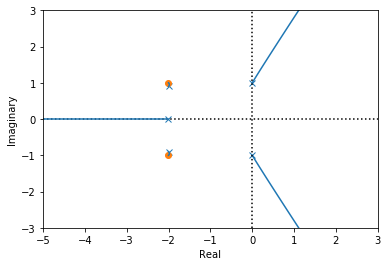

In [14]:
sys22 = tf([2,8,10],[1,6,13.81,15.62,12.81,9.62])
r,k = root_locus(sys22,xlim = (-5,3),ylim = (-3,3))

So by adding the $G_c$ = $\frac{(−i+s+2)(i+s+2))}{(−0.9i+s+2)(0.9i+s+2)}$, we can add two poles and two zeros near the desired point $-2 \pm i$. when K approaches to $\infty$, the poles would be close to $-2 \pm i$.

3,  To let both poles and zeros falls near the desired point, I picked the value of 0.9i for the poles.  I used the same $G_c$ in this question. 

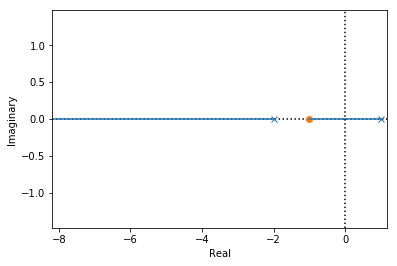

In [15]:
#original root locus 
#original root locus 
sys3 = tf([1,1],[1,1,-2])
r,k = root_locus(sys3)

In [16]:
G3 = (s+1)/(s-1)/(s+2)*b/a
G3.simplify()

        (s + 1)⋅(-i + s + 2)⋅(i + s + 2)        
────────────────────────────────────────────────
(s - 1)⋅(s + 2)⋅(-0.9⋅i + s + 2)⋅(0.9⋅i + s + 2)

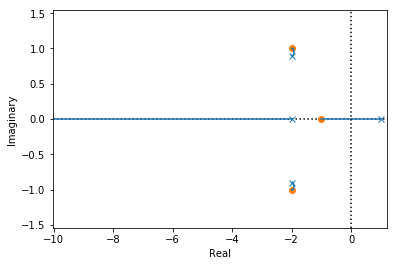

In [17]:
sys33 = tf([1,5,9,5],[1,5,6.81,-3.19,-9.62])
r,k = root_locus(sys33)

So by adding the $G_c$ = $\frac{(−i+s+2)(i+s+2))}{(−0.9i+s+2)(0.9i+s+2)}$, we can add two poles and two zeros near the desired point $-2 \pm i$. when K approaches to $\infty$, the poles would be close to $-2 \pm i$.

# 3. Control of a Ducted Fan Wing

Check out [this video](https://www.youtube.com/watch?v=ZFb5kFpgCm4) of a ducted fan. 

The transfer function for the pitch subsystem is

$$
G(s) = \frac{\theta(s)}{\tau(s)} = \frac{r}{J s^2 + bs + mgl}
$$

where $\theta(s)$ is the pitch and $\tau(s)$ is the input torque. The
values of the constants were measured and found to be $g = 9.81
\;m/s^2$, $m=1.5 \; kg$, $b = 0.05 kg/s$, $l = 0.05 m$, $J = 0.0475 kg
m^2$ and $r = 0.25 m$.

Recall that a PID controller has the form

$$
G_C(s) = \frac{K(s-z_1)(s-z_2)}{s}
$$

Find positions for the zeros and a value for $K$ so that the step response has a settling time of $0.1$ seconds and an overshoot of 10%. Plot the root locus for your system and show indicate where value of $K$ you used is.

Find the sensitivity of the percent overshoot in the closed loop system to changes in $b$. Make a plot of percent overshoot vs $b$ where $b$ goes from 50% of the value given above to 150% of the value given above.



The closed loop for this system have the function: $\frac{K G_c G }{ ( 1 + K G_c G)} = T(s)$
So we can use  the standard second order form to find the values. 
$$ = \frac{r*K*(s-z_1)(s-z_2)}{s(J s^2 + bs + mgl)}$$ 
plug in the values: 
$$ = \frac{0.375*K*(s-z_1)(s-z_2)}{0.0475s^3 + 0.05s^2 + 0.73575s}$$

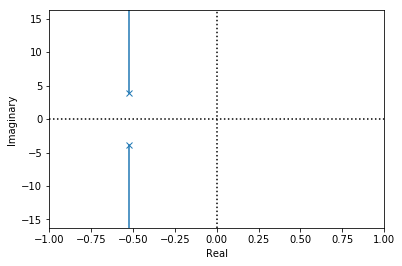

In [64]:
sysa = tf([0.375],[0.0475,0.05,0.7375])
r,k = root_locus(sysa, xlim = (-1,1))

if we want the settling time = 0.1s and P.O = 10% we have: 
$$\zeta \omega = 0.1$$ 
$$\frac{\zeta\pi}{\beta} = -ln(0.1)$$

In [65]:
var("s zeta omega b")
sol=solve([zeta*omega-0.1, zeta*np.pi/sqrt(1-zeta**2)-log(0.1)])[0]
sol

{ω: -0.169160362819508, ζ: -0.591155033798899}

In [66]:
den = (s**2 + 2*zeta*omega*s + omega**2).subs(sol)
den

 2                             
s  + 0.2⋅s + 0.0286152283492275

In [67]:
den = (s**2 + 2*zeta*omega*s + omega**2).subs(sol)

poles = solve(den,s)

poles

[-0.1 - 0.136437635384184⋅ⅈ, -0.1 + 0.136437635384184⋅ⅈ]

In [68]:
Gc = den / s
Gc

 2                             
s  + 0.2⋅s + 0.0286152283492275
───────────────────────────────
               s               

In [69]:
G = 0.375 / ( 0.0475*s**2 + 0.05*s + 0.73575 )
GcG = Gc*G
GcG.cancel()

    ⎛       2                               ⎞
1.0⋅⎝0.375⋅s  + 0.075⋅s + 0.0107307106309603⎠
─────────────────────────────────────────────
               3         2                   
       0.0475⋅s  + 0.05⋅s  + 0.73575⋅s       

In [70]:
var("K")
T = K * Gc * G / ( 1 + K * Gc * G)
T.cancel()
num,den=fraction(T)
zeros = solve(den.subs(K,0))
poles = solve(den.subs(K,10000))
zeros, poles

([0.0, -0.526315789473684 - 3.9003160607778⋅ⅈ, -0.526315789473684 + 3.90031606
07778⋅ⅈ], [-78948.2208589556, -0.100096837971888 - 0.136365473659306⋅ⅈ, -0.100
096837971888 + 0.136365473659306⋅ⅈ])

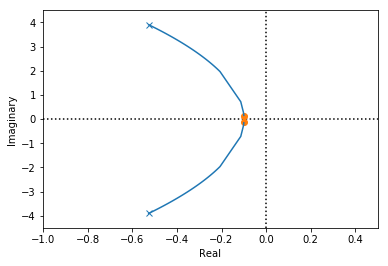

In [71]:
sys = tf([0.375,0.075,0.01073],[0.0475,0.05,0.7375])
r,k=root_locus(sys,xlim = (-1,0.5),ylim = (-4.5,4.5))

As we can see, to let the settling time and percent overshoot meet the specification we have the root locus as above; the K varies in the graph, for K = 0 corresponds to the zero and K = $\infty$ corresponds to pole: I choose 10000 to represent a large number for the pole substitution.

In [72]:
G = 0.375 / ( 0.0475*s**2 + b*s + 0.73575 )
GcG = Gc*G
GcG.cancel()

    ⎛       2                               ⎞
1.0⋅⎝0.375⋅s  + 0.075⋅s + 0.0107307106309603⎠
─────────────────────────────────────────────
              2           3                  
       1.0⋅b⋅s  + 0.0475⋅s  + 0.73575⋅s      

The percent overshoot formula of the system we calculated above: 
$$Y(s) = \frac{0.375s^2+0.075s+0.01073}{0.0475s^3+bs^2+0.7375s} = 0.51sT(s) + 0.102T(s)+\frac{0.0145T(s)}{s} $$
where T(s) is the standard form 
$$
T(s) = \frac{\omega^2}{s^2 + 2 \zeta \omega s + \omega^2}= \frac{3.94^2}{s^2 +  \frac{b}{0.0475} s + 3.94}
$$.
 that $\zeta = 2.67b, \omega = 3.94$.
 <br>
So the total transfer function in time domain would be: 
$$
Y(t) = 0.51dy + 0.102y+ 0.0145\int y
$$
where
$$
y(t) = 1 - \frac{1}{\beta} e^{-\zeta \omega t} \sin(\omega \beta t + \theta).
$$

So P.O = $e^{-\zeta \frac{\pi}{\beta}}$ 

In [73]:
var("beta zeta omega t theta K_p K_I",real = true,positive = true)
po = exp(-zeta*np.pi/beta)
po= po.subs(beta,(1-zeta**2)**0.5).subs(zeta,2.67*b).subs(omega,3.94)
po

                                      -0.5
                     ⎛          2    ⎞    
 -8.38805238508475⋅b⋅⎝- 7.1289⋅b  + 1⎠    
ℯ                                         

In [74]:
Spob = diff(po,b)*b/po
Spob

  ⎛                                       -1.5                                
  ⎜                    2 ⎛          2    ⎞                        ⎛          2
b⋅⎝- 59.7975866480307⋅b ⋅⎝- 7.1289⋅b  + 1⎠     - 8.38805238508475⋅⎝- 7.1289⋅b 

     -0.5⎞
    ⎞    ⎟
 + 1⎠    ⎠

Text(0.5, 1.0, 'sensitivity corresponds to b')

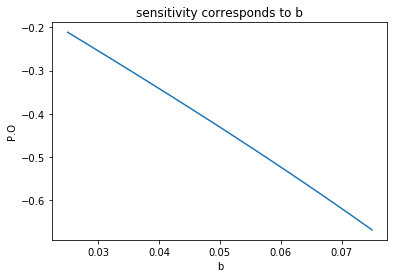

In [75]:
B = np.linspace(0.5*0.05,1.5*0.05,100)
f = B*(-59.7976*B**2/(-7.128*B**2+1)**1.5-8.3881/(-7.1289*B**2+1)**0.5)
#f = lambdify(b,Spob,'numpy')
plt.plot(B,f)
plt.xlabel("b")
plt.ylabel("P.O")
plt.title("sensitivity corresponds to b")


Text(0.5, 1.0, 'sensitivity corresponds to b')

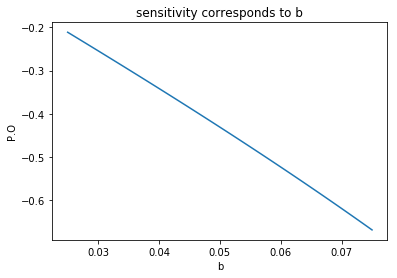

In [76]:
Barray= np.linspace(0.5*0.05,1.5*0.05,100)
#f = B*(-59.7976*B**2/(-7.128*B**2+1)**1.5-8.3881/(-7.1289*B**2+1)**0.5)
f = lambdify(b,Spob,'numpy')
plt.plot(Barray,f(Barray))
plt.xlabel("b")
plt.ylabel("P.O")
plt.title("sensitivity corresponds to b")

## code below are trashes... 
*** 

In [27]:
#So the total function of the Y: 
var("beta zeta omega t theta K_p K_I",real = true,positive = true)
y = 1-exp(-zeta*omega/beta)/beta*sin(omega*beta*t+theta)
dify = diff(y,t)
diffY= 0.51*diff(dify,t)+0.102*diff(y,t)+0.0145*y
diffY

                                                                              
           -ω⋅ζ                            -ω⋅ζ                               
           ─────                           ─────                              
        2    β                               β                             0.0
0.51⋅β⋅ω ⋅ℯ     ⋅sin(β⋅ω⋅t + θ) - 0.102⋅ω⋅ℯ     ⋅cos(β⋅ω⋅t + θ) + 0.0145 - ───
                                                                              

     -ω⋅ζ                
     ─────               
       β                 
145⋅ℯ     ⋅sin(β⋅ω⋅t + θ)
─────────────────────────
          β              

In [99]:
#plug the value in: 
Ysubs = diffY.subs(beta,(1-zeta**2)**0.5).subs(zeta,2.67*b).subs(omega,3.94)
Ysubs

                                                            -0.5              
                          -0.5             ⎛          2    ⎞        ⎛         
         ⎛          2    ⎞      -10.5198⋅b⋅⎝- 7.1289⋅b  + 1⎠        ⎜       ⎛ 
- 0.0145⋅⎝- 7.1289⋅b  + 1⎠    ⋅ℯ                                ⋅sin⎝3.94⋅t⋅⎝-

                                                                              
               0.5    ⎞                             0.5             ⎛         
         2    ⎞       ⎟            ⎛          2    ⎞     -10.5198⋅b⋅⎝- 7.1289⋅
 7.1289⋅b  + 1⎠    + θ⎠ + 7.917036⋅⎝- 7.1289⋅b  + 1⎠   ⋅ℯ                     

       -0.5                                                                   
 2    ⎞        ⎛                        0.5    ⎞                              
b  + 1⎠        ⎜       ⎛          2    ⎞       ⎟                     -10.5198⋅
           ⋅sin⎝3.94⋅t⋅⎝- 7.1289⋅b  + 1⎠    + θ⎠ + 0.0145 - 0.40188⋅ℯ         

                   -0.5                          

In [ ]:
solY = solve(Ysubs,t)
solY

In [ ]:
integral(y,t)